<a href="https://colab.research.google.com/github/adifatol/BIQA/blob/master/modelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the features

In [16]:
!pip install PyDrive
!rm -rf *.pkl #remove existing files first

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

file_ids = ['1EY-MnAEGD2XfvaxKjKtjZwfeUy9bDQxw', '1ZvvqCQ_Rgd1HILrhR3PQiLnqpEaPCHa3', '1aeCbRLnSaqD5DbDnCC3Rqm3beQ7wNnTf', '17CzpXiWSwDMmMph8dimNa5vuHpZW6qr7']
filenames= ['filtered_02.pkl','filtered_20.pkl','filtered_40.pkl','all_scores.pkl']

for i in range(len(file_ids)):
  file_id = file_ids[i]
  file_name = filenames[i]
  print(file_id, file_name)
  file = drive.CreateFile({'id':file_id, 'parents':[{u'id': "1Iu9bS-fovG20py9_9A2-M7BJ56HG-sNB"}]})
  file.GetContentFile(file_name)


1EY-MnAEGD2XfvaxKjKtjZwfeUy9bDQxw filtered_02.pkl
1ZvvqCQ_Rgd1HILrhR3PQiLnqpEaPCHa3 filtered_20.pkl
1aeCbRLnSaqD5DbDnCC3Rqm3beQ7wNnTf filtered_40.pkl
17CzpXiWSwDMmMph8dimNa5vuHpZW6qr7 all_scores.pkl


In [17]:
!ls

adc.json	filtered_02.pkl  filtered_40.pkl
all_scores.pkl	filtered_20.pkl  sample_data


In [18]:
import pickle

filtered_02 = pickle.load(open('filtered_02.pkl','rb'))
filtered_20 = pickle.load(open('filtered_20.pkl','rb'))
filtered_40 = pickle.load(open('filtered_40.pkl','rb'))
all_scores = pickle.load(open('all_scores.pkl','rb'))
print(len(filtered_02))
print(len(filtered_20))
print(len(filtered_40))
print(len(all_scores))

86700
86700
86700
86700


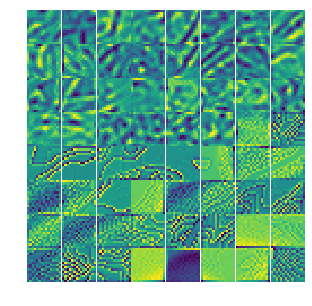

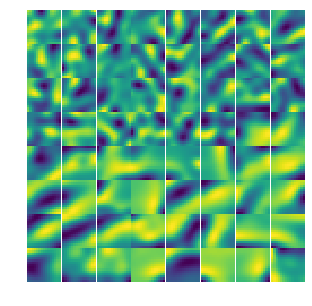

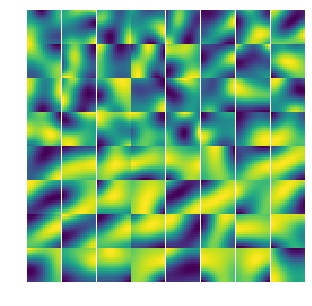

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

def prevForScore(score, filterset):
  w=5
  h=5

  fig=plt.figure(figsize=(w, h))

  columns = 8
  rows = 8
  f = -1
  for i in range(1, columns*rows +1):
    f=f+1
    while True:
      _,intScore = math.modf(all_scores[f] * 10)
      if (intScore == score):
        break
      f=f+1
    img = filterset[f]
    fig.add_subplot(rows, columns, i)
    plt.rcParams["axes.grid"] = False
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.imshow(img, interpolation="none")
  plt.show()

prevForScore(4, filtered_02)
prevForScore(4, filtered_20)
prevForScore(4, filtered_40)
